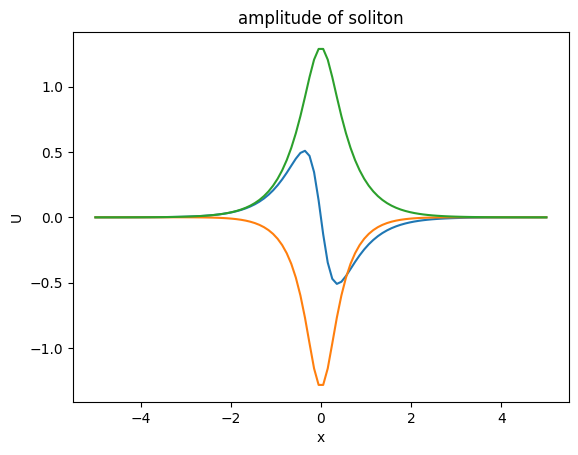

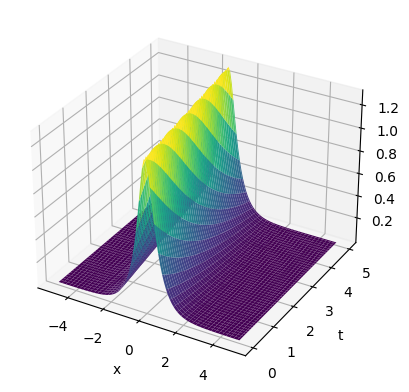

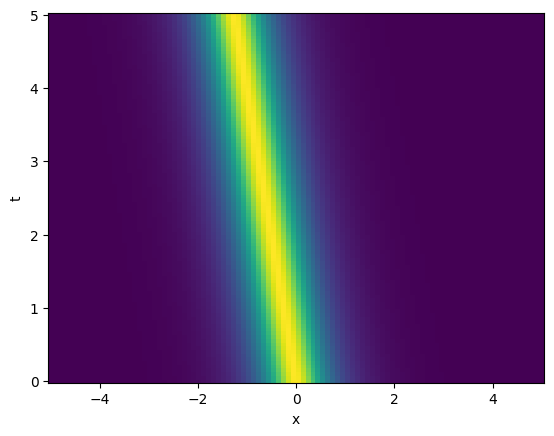

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

torch.manual_seed(123)
np.random.seed(2)

N=100
x_min = -5
x_max = 5
t_min = 0
t_max = 5

x_space = np.linspace(x_min, x_max, N)
t_space = np.linspace(t_min, t_max, N)

def FLE_lashkin(x, t):
    gamma= 30
    Delta = 1

    z = 2*Delta**2*(x + t/(4*Delta**4))*np.sin(gamma)
    phi =  2*Delta**2*(x - t/(4*Delta**4))*np.cos(gamma)

    U = np.exp(-1j*phi)*( np.exp(-1j*gamma)  - np.exp(1j*gamma) ) \
        /((  np.exp(-z)*np.exp(-1j*gamma/2) + np.exp(z)*np.exp(1j*gamma/2)   )*Delta)


    U_real = np.real(U)
    U_imag = np.imag(U)

    return U_real, U_imag

U_real, U_imag = FLE_lashkin(x_space, t=0)


plt.plot(x_space, U_real)
plt.plot(x_space, U_imag)
plt.plot(x_space, np.sqrt(U_imag**2 + U_real**2))
plt.xlabel("x")
plt.ylabel("U")
plt.title("amplitude of soliton")
plt.show()


XX, TT = np.meshgrid(x_space, t_space)
U3D_real, U3D_imag = FLE_lashkin(XX, TT)
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, np.sqrt(U3D_imag**2 + U3D_real**2), cmap="viridis")
plt.xlabel("x")
plt.ylabel("t")
plt.show()


plt.pcolor(XX, TT, np.sqrt(U3D_imag**2 + U3D_real**2), cmap="viridis")
plt.xlabel("x")
plt.ylabel("t")
plt.show()



#Initial Condition

we take $u(x, t=0)$ as initial condition , which is further divided into real and imaginary part $r$ and $m$.


where $u(x,t)$ is

$$U = \frac{\sin{\gamma} e^{i \phi}} {i \Delta \cosh({z + i \frac {\gamma}{2}})  }
$$

We convert them $$U =\frac{\left(e^{-i \gamma }-e^{i \gamma }\right) e^{-i \phi }}{\Delta  \left(e^{-z-\frac{i \gamma }{2}}+e^{z+\frac{i \gamma }{2}}\right)}$$


where $$\phi =2 \Delta ^2 \cos (\gamma ) \left(x-\frac{t}{4 \Delta ^4}\right); $$

$$z=2 \Delta ^2 \sin (\gamma ) \left(\frac{t}{4 \Delta ^4}+x\right)$$


We take $N_0 = 500$ points for initial condition i.e at $t=0$

$N_b = 500$ points for boundary of spatial condition i.e at $x=-5$ and $x=5$

$N_r$ =10000 points for collocation i.e. at all computational domain $x={-5,5}$ and $t={0,5}$

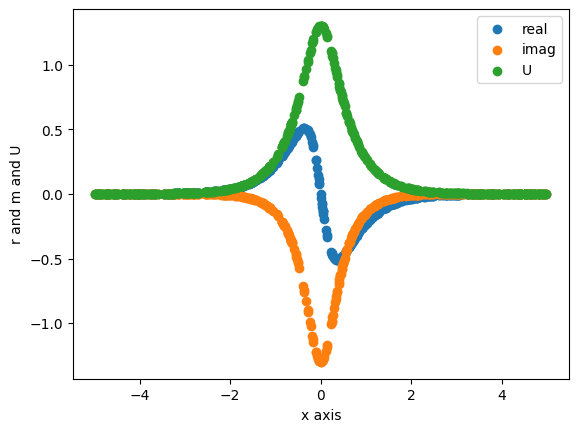

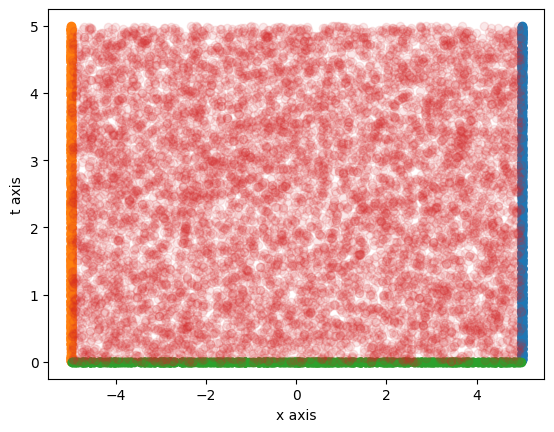

In [ ]:
N_0 = 500  # initial at time t = 0 boundary points
N_b = 500  # boundary points
N_r = 10000  # collacation points


#initial condition of U  at t=0 which is U(x, t=0)
x_0 = np.random.uniform(low=x_min, high=x_max, size=(N_0, 1))
t_0 = np.ones((N_0, 1), dtype=np.float64)*t_min


r_0 ,m_0 = FLE_lashkin(x_0, t=0)

plt.scatter(x_0, r_0, label="real")
plt.scatter(x_0, m_0, label="imag")
plt.scatter(x_0, np.sqrt(m_0**2 + r_0**2), label="U")
plt.xlabel("x axis")
plt.ylabel("r and m and U")
plt.legend()
plt.show()




# boundary points at x = -5
t_b1 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b1 = np.ones((N_b, 1), dtype=np.float64)*x_min
#Dirichlet BC
U_b1 = np.ones((N_b, 1), dtype=np.float64)*0


# boundary points at x = 5
t_b2 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b2 = np.ones((N_b, 1), dtype=np.float64)*x_max
#Dirichlet BC
U_b2 = np.ones((N_b, 1), dtype=np.float64)*0


# uniform distribution
x_c = np.random.uniform(low=x_min, high=x_max, size=(N_r, 1))
t_c = np.random.uniform(low=t_min, high=t_max, size=(N_r, 1))



plt.scatter(x_b2, t_b2)
plt.scatter(x_b1, t_b1)
plt.scatter(x_0, t_0)
plt.scatter(x_c, t_c, alpha=0.1)
plt.xlabel("x axis")
plt.ylabel("t axis")
plt.show()


# Neural NetWork

40 neuron of 8 hidden layer with $tanh(x)$ as activation function

In [ ]:
class Neural_network(nn.Module):
  def __init__(self):
    super(Neural_network, self).__init__()
    self.input_layer = nn.Linear(2,40)

    self.hidden_layer1 = nn.Linear(40,40)
    self.hidden_layer2 = nn.Linear(40,40)
    self.hidden_layer3 = nn.Linear(40,40)
    self.hidden_layer4 = nn.Linear(40,40)
    self.hidden_layer5 = nn.Linear(40,40)
    self.hidden_layer6 = nn.Linear(40,40)
    self.hidden_layer7 = nn.Linear(40,40)
    self.hidden_layer8 = nn.Linear(40,40)
    self.output_layer = nn.Linear(40,2)

  def forward(self, x):
    x = self.input_layer(x)
    x = torch.tanh(x)
    x = torch.tanh(self.hidden_layer1(x))
    x = torch.tanh(self.hidden_layer2(x))
    x = torch.tanh(self.hidden_layer3(x))
    x = torch.tanh(self.hidden_layer4(x))
    x = torch.tanh(self.hidden_layer5(x))
    x = torch.tanh(self.hidden_layer6(x))
    x = torch.tanh(self.hidden_layer7(x))
    x = torch.tanh(self.hidden_layer8(x))
    x = self.output_layer(x)
    return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

Net = Neural_network()
Net = Net.to(device)
loss_fu = nn.MSELoss()
optim = torch.optim.Adam(Net.parameters(), lr=0.001)

cuda:0


# Numpy to Tensor

convert numpy into tensor so that we can process them with Neural Network

In [ ]:
#initial
x_01 = torch.autograd.Variable( torch.from_numpy(x_0).float(), requires_grad=False).to(device)
t_01 = torch.autograd.Variable( torch.from_numpy(t_0).float(), requires_grad=False).to(device)
R_01 = torch.autograd.Variable( torch.from_numpy(r_0).float(), requires_grad=False).to(device)
M_01 = torch.autograd.Variable( torch.from_numpy(m_0).float(), requires_grad=False).to(device)
X_0 = torch.cat([x_01, t_01], axis=1)

#BC1
x_b11 = torch.autograd.Variable( torch.from_numpy(x_b1).float(), requires_grad=True).to(device)
t_b11 = torch.autograd.Variable( torch.from_numpy(t_b1).float(), requires_grad=False).to(device)
U_b11 = torch.autograd.Variable( torch.from_numpy(U_b1).float(), requires_grad=False).to(device)
X_b1 = torch.cat([x_b11, t_b11], axis=1)

#BC2
x_b21 = torch.autograd.Variable( torch.from_numpy(x_b2).float(), requires_grad=True).to(device)
t_b21 = torch.autograd.Variable( torch.from_numpy(t_b2).float(), requires_grad=False).to(device)
U_b21 = torch.autograd.Variable( torch.from_numpy(U_b2).float(), requires_grad=False).to(device)
X_b2 = torch.cat([x_b21, t_b21], axis=1)

# FLE



We define a function pde that calculates two partial differential equations (PDEs i.e real and imag of FLE based on the inputs
$x$, $t$ and a neural network model **Net**.


The neural network takes the inputs
$x$ (a spatial variable) and
$t$ (a time variable) and returns two outputs, which are split into rr and mm.

The function calculates various derivatives of rr and mm with respect to
$x$ and $t$, which are then used to construct the two PDEs, pde1 and pde2.

pde1 and pde2 are noting but real and imaginary part of FLE.

In [ ]:
def pde(x, t, Net):
  """x_1 and t_1: These are converted from numpy arrays to PyTorch tensors,
  where requires_grad=True allows automatic differentiation of these tensors."""
  x_1 = torch.autograd.Variable( torch.from_numpy(x).float(), requires_grad=True).to(device)
  t_1 = torch.autograd.Variable( torch.from_numpy(t).float(), requires_grad=True).to(device)
  X = torch.cat([x_1, t_1], axis=1)
  """X: The spatial and time tensors (x_1 and t_1) are concatenated
  along the second dimension, creating the input for the neural network."""

  rr = Net.forward(X)[:, 0:1]
  mm = Net.forward(X)[:, 1:2]

  # Two Outputs of Neural Network is infered as r and m ,
  #U = r + i m




  r_x = torch.autograd.grad(rr.sum(), x_1, create_graph=True)[0]
  r_xx = torch.autograd.grad(r_x.sum(), x_1, create_graph=True)[0]
  r_xxx = torch.autograd.grad(r_xx.sum(), x_1, create_graph=True)[0]
  r_t = torch.autograd.grad(rr.sum(), t_1, create_graph=True)[0]
  r_xt = torch.autograd.grad(r_t.sum(), x_1, create_graph=True)[0]

  m_x = torch.autograd.grad(mm.sum(), x_1, create_graph=True)[0]
  m_xx = torch.autograd.grad(m_x.sum(), x_1, create_graph=True)[0]
  m_xxx = torch.autograd.grad(m_xx.sum(), x_1, create_graph=True)[0]
  m_t = torch.autograd.grad(mm.sum(), t_1, create_graph=True)[0]
  m_xt = torch.autograd.grad(m_t.sum(), x_1, create_graph=True)[0]

  e = 0.05
  # e is perturbation term


  pde1 = r_xt - rr - (rr**2 + mm**2)*m_x  + e*r_x
  pde2 = m_xt - mm  + (rr**2 + mm**2)*r_x + e*m_x



  return pde1, pde2

epoch:0, loss:2.20655489,  Loss_pde:20.13627625
epoch:100, loss:0.04511783,  Loss_pde:35.65010071
epoch:200, loss:0.02052133,  Loss_pde:19.45890617
epoch:300, loss:0.00971263,  Loss_pde:8.74362564
epoch:400, loss:0.00789364,  Loss_pde:7.06930447
epoch:500, loss:0.00677232,  Loss_pde:6.18348789
epoch:600, loss:0.00607989,  Loss_pde:5.62648869
epoch:700, loss:0.00581549,  Loss_pde:5.18244457
epoch:800, loss:0.00749548,  Loss_pde:5.43083858
epoch:900, loss:0.00558801,  Loss_pde:4.76697731
epoch:1000, loss:0.00664945,  Loss_pde:4.65783215
epoch:1100, loss:0.00507047,  Loss_pde:4.17034245
epoch:1200, loss:0.00516165,  Loss_pde:4.18001413
epoch:1300, loss:0.00418004,  Loss_pde:3.63237476
epoch:1400, loss:0.00494471,  Loss_pde:3.79875326
epoch:1500, loss:0.00377295,  Loss_pde:3.30917358
epoch:1600, loss:0.00434945,  Loss_pde:3.29199648
epoch:1700, loss:0.00360374,  Loss_pde:3.10860801
epoch:1800, loss:0.00337043,  Loss_pde:2.97536182
epoch:1900, loss:0.00366275,  Loss_pde:2.72868729
epoch:200

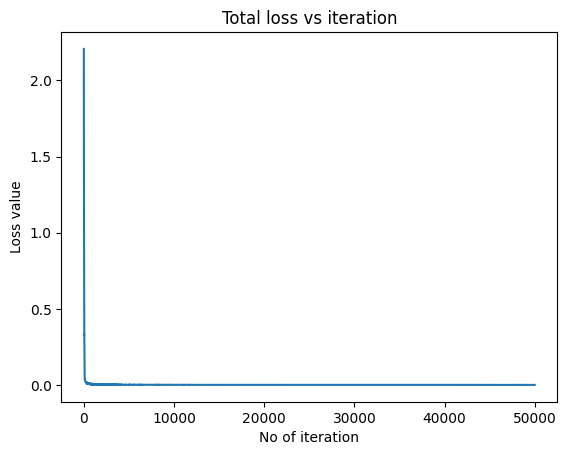

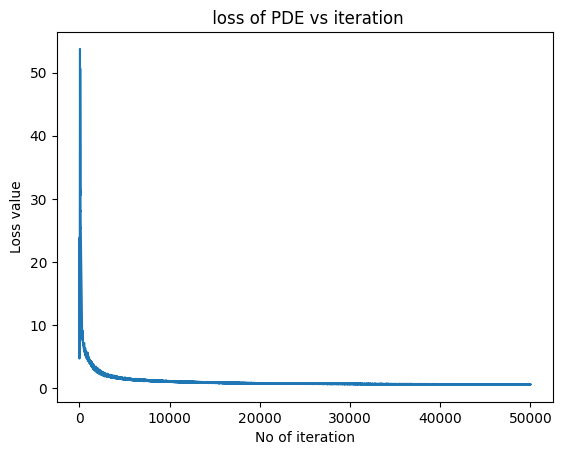

In [ ]:
import time

number_of_epoch = 50000
loss_value = []
loss_value1 = []
loss_value2 = []
loss_value3 = []

start_time = time.time()


for epoch in range(number_of_epoch):
  optim.zero_grad()       # make the gradient zero

  r_pred_0, m_pred_0  = Net.forward(X_0)[:, 0:1], Net.forward(X_0)[:, 1:2]      #forward pass for initial data
  Loss_initial = loss_fu(r_pred_0, R_01 ) + loss_fu(m_pred_0, M_01 )    # loss of initial

  r_pred_b1, m_pred_b1 = Net.forward(X_b1)[:, 0:1], Net.forward(X_b1)[:, 1:2]
  Loss_b1 = loss_fu(r_pred_b1, U_b11) + loss_fu(m_pred_b1, U_b11)             # left boudary loss

  r_pred_b2, m_pred_b2 = Net.forward(X_b2)[:, 0:1], Net.forward(X_b2)[:, 1:2]
  Loss_b2 = loss_fu(r_pred_b2, U_b21) + loss_fu(m_pred_b2, U_b21)            #right boundary loss

  r_pred_b1_x = torch.autograd.grad(r_pred_b1.sum(), x_b11, create_graph=True)[0]
  m_pred_b1_x = torch.autograd.grad(m_pred_b1.sum(), x_b11, create_graph=True)[0]

  r_pred_b2_x = torch.autograd.grad(r_pred_b2.sum(), x_b21, create_graph=True)[0]
  m_pred_b2_x = torch.autograd.grad(m_pred_b2.sum(), x_b21, create_graph=True)[0]

  loss_b3 = loss_fu(r_pred_b1_x, r_pred_b2_x)
  loss_b4 = loss_fu(m_pred_b1_x, m_pred_b2_x)


  pdee1, pdee2= pde(x_c, t_c, Net)                # pde losss
  Loss_pde = torch.linalg.norm(pdee1) + torch.linalg.norm(pdee2)


  total_loss =  (10*Loss_initial +  Loss_b1 + Loss_b2)  +  0.001*( Loss_pde)  #+  0.0001*(Loss_conserve11 + Loss_conserve33) #Loss_conserve5 +  + Loss_conserve33) ) (Loss_conserve1 + Loss_conserve3)\

  total_loss.backward()    # computing gradients using backward propagation  dL/dw
  optim.step()             # This is equivalent to : Weight_new = weight_old - learing_rate * derivative of Loss w.r.t weight

  loss_value.append(total_loss.cpu().detach().numpy())

  loss_value2.append(Loss_pde.cpu().detach().numpy())
  with torch.autograd.no_grad():
    if epoch%100==0:
      print(f'epoch:{epoch}, loss:{total_loss.item():.8f},  Loss_pde:{Loss_pde.item():.8f}')

print("total time:",time.time() - start_time, "seconds")
print("total time:",(time.time() - start_time)/60, "minutes")

# total loss
plt.plot(loss_value)
plt.ylabel("Loss value")
plt.xlabel("No of iteration")
plt.title("Total loss vs iteration")
plt.show()



# loss of PDE
plt.plot(loss_value2)
plt.ylabel("Loss value")
plt.xlabel("No of iteration")
plt.title(" loss of PDE vs iteration")
plt.show()

In [ ]:
x_space = np.linspace(x_min, x_max, N)
t_space = np.linspace(t_min, t_max, N)
x, t = np.meshgrid(x_space, t_space)



X = np.hstack((x.flatten()[:, None], t.flatten()[:, None]))
X_tensor = torch.from_numpy(X).float().to(device)

R_pred = Net.forward(X_tensor)[:, 0:1] # if use GPU
R_pred1 = R_pred.detach().cpu().numpy().reshape(N, N)

M_pred = Net.forward(X_tensor)[:, 1:2] # if use GPU
M_pred1 = M_pred.detach().cpu().numpy().reshape(N, N)

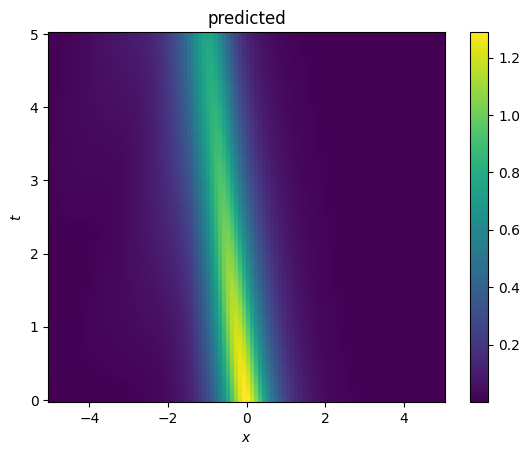

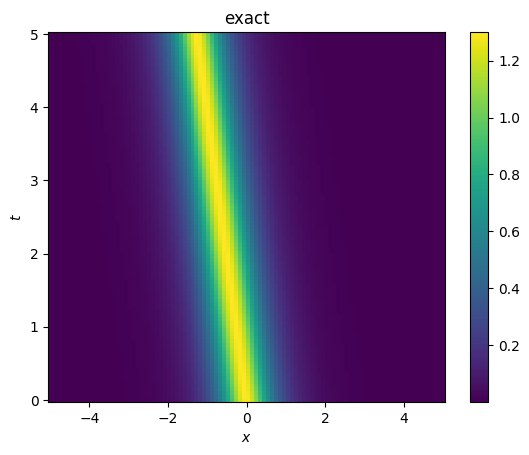

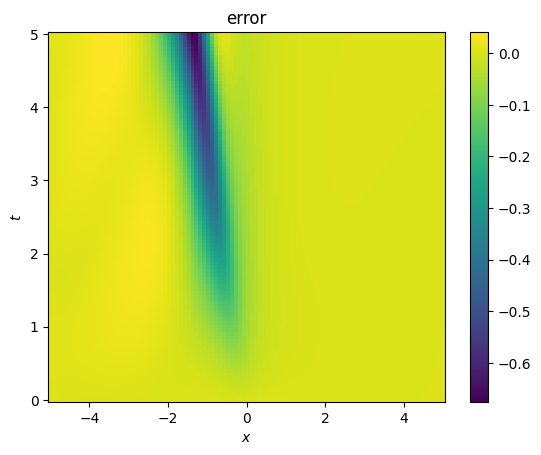

In [ ]:
plt.pcolor(x, t, np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.title("predicted")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.colorbar()
plt.savefig("predicted_density_bright_conserve.pdf", dpi='figure', transparent = True)
plt.show()


u_real , u_imag = FLE_lashkin(x, t)
plt.pcolor(x, t, np.sqrt(u_real**2 + u_imag**2), cmap="viridis")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.colorbar()
plt.title("exact")
plt.savefig("exact_density_bright_conserve.pdf", dpi='figure', transparent = True)
plt.show()

error = np.sqrt(R_pred1**2 + M_pred1**2) - np.sqrt(u_real**2 + u_imag**2)
plt.pcolor(x, t, error, cmap="viridis")
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.colorbar()
plt.title("error")
plt.savefig("error_bright_conserve.pdf", dpi='figure', transparent = True)
plt.show()



1.4034893035888674
1.301343631744385
1.1821764945983888
1.0578089714050294
0.9396284103393555
0.8376498222351074
0.7564675331115723
0.693630075454712
0.6423914909362793
0.5962780952453614


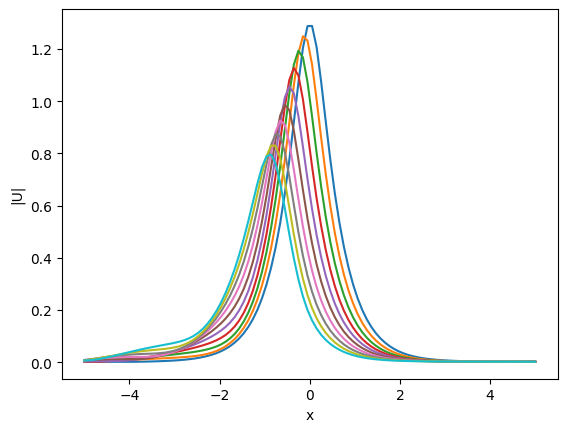

In [ ]:
U_predicted = np.sqrt(R_pred1**2 + M_pred1**2)
for ml in range(0 , N, 10):
  plt.plot(x_space, U_predicted[ml, :])
  plt.xlabel("x")
  plt.ylabel("|U|")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(U_predicted[ml, :]**2))

# Amplitude Vs Time

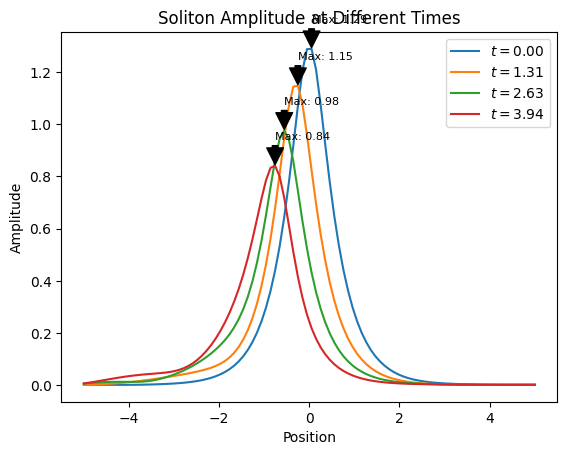

In [ ]:
for mll in range(0, N, 26):
    #plt.plot(x_space, U_predicted[mll, :], label=f't={mll}')
    plt.plot(x_space, U_predicted[mll, :], label=f'$t = %.2f$' % (t_space[mll])  )
    #'$t = %.2f$' % (t_space[0])
    #'$t = %.2f$' % (mll)


    # Find the maximum point
    max_index = np.argmax(U_predicted[mll, :])
    max_value = U_predicted[mll, max_index]
    max_position = x_space[max_index]

    # Annotate the maximum point
    plt.annotate(f'Max: {max_value:.2f}',
                 xy=(max_position, max_value),
                 xytext=(max_position, max_value + 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=8)

plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.title('Soliton Amplitude at Different Times')
plt.legend()
plt.savefig("Amplitude.pdf", dpi='figure', transparent = True)

plt.show()

# Width Over Time

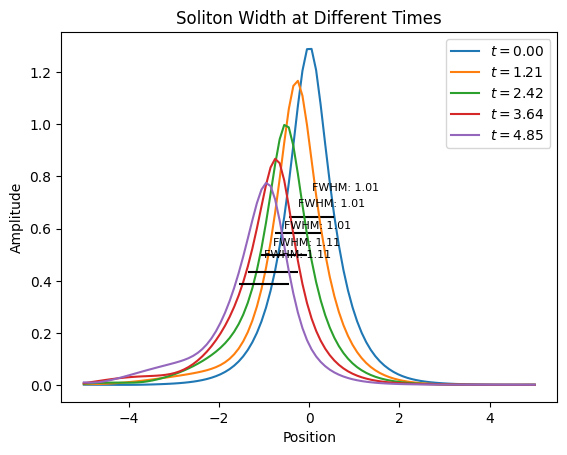

In [ ]:
U_predicted = np.sqrt(R_pred1**2 + M_pred1**2)

# Function to calculate FWHM
def calculate_fwhm(x, y):
    half_max = max(y) / 2
    indices = np.where(y >= half_max)[0]
    if len(indices) >= 2:
        fwhm = x[indices[-1]] - x[indices[0]]
        return fwhm, x[indices[0]], x[indices[-1]], half_max
    else:
        return None, None, None, None

# Plotting
plt.figure()
for mll in range(0, N, 24):
    plt.plot(x_space, U_predicted[mll, :], label=f'$t = %.2f$' % (t_space[mll]))

    # Find the maximum point
    max_index = np.argmax(U_predicted[mll, :])
    max_value = U_predicted[mll, max_index]
    max_position = x_space[max_index]



    # Calculate FWHM
    fwhm, left_index, right_index, half_max = calculate_fwhm(x_space, U_predicted[mll, :])
    if fwhm is not None:
        # Plot the FWHM line
        plt.hlines(half_max, left_index, right_index, color='black', linestyle='-')
        plt.annotate(f'FWHM: {fwhm:.2f}',
                     xy=((left_index + right_index) / 2, half_max),
                     xytext=((left_index + right_index) / 2, half_max + 0.1),
                     fontsize=8, color='black')

plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.title('Soliton Width at Different Times')
plt.legend()
plt.savefig("Width.pdf", dpi='figure', transparent = True)

plt.show()

1.4017672663609158
1.4017672658410727
1.4017672641269492
1.4017672607603429
1.4017672549078477
1.4017672451041037
1.4017672288343883
1.4017672019402228
1.4017671576070958
1.4017670845872188


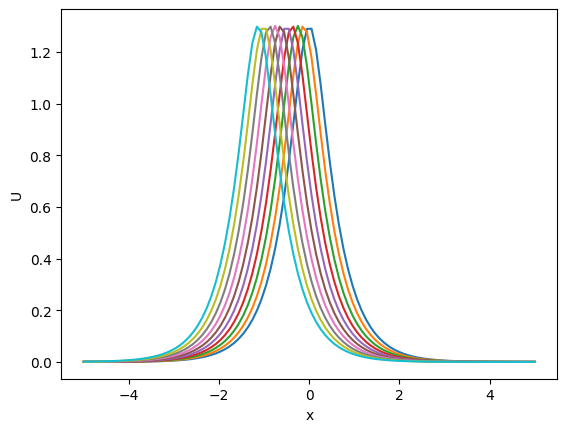

In [ ]:
U = np.sqrt(u_real**2 + u_imag**2)
for mk in range(0 , N, 10):

  plt.plot(x_space, U[mk, :])
  plt.xlabel("x")
  plt.ylabel("U")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(U[mk, :]**2))

#Conserve Qunatity Based Calculation

In [ ]:
def dydx(x, y):
    """
    Calculate the derivative of one 1D array with respect to another 1D array.

    Parameters:
        x (ndarray): 1D array representing the independent variable.
        y (ndarray): 1D array representing the dependent variable.

    Returns:
        ndarray: Derivative of y with respect to x.
    """
    # Calculate differences in x and y
    dx = np.gradient(x)
    dy = np.gradient(y)


    # Calculate differences in x and y
    #dx = x[1:] - x[:-1]
    #dy = y[1:] - y[:-1]

    # Ensure that the lengths of x and y are the same
    if len(dx) != len(dy):
        raise ValueError("The lengths of x and y should be the same.")

    # Calculate the derivative dy/dx
    derivative = dy / dx

    return derivative

def integral_approximation(f, aa):
  return (aa.max() - aa.min() )*np.mean(f)

# Energy


$E = \int_{-\infty}^{+ \infty} |u_x|^2 dx$

In [ ]:
def Calculation_of_E(r, m, x):
  U = r + 1j*m
  U_x = np.gradient(U, x)


  U1 = np.abs(U_x)**2

  U2 = np.trapz(U1, x_space)
  E = np.abs(np.trapz(U1, x_space))

  return E

H1_t0 = Calculation_of_E(R_pred1[0, :], M_pred1[0, :], x_space)
H1_t1 = Calculation_of_E(R_pred1[-1, :], M_pred1[-1, :], x_space)
H1_exact = Calculation_of_E(u_real[0, :], u_imag[0, :], x_space)

print("E at t=0", H1_t0)
print("E at t=1", H1_t1)
print("E exact", H1_exact)
print(" Diference Between Exact E and Predictied E at t=0 :", np.abs(H1_t0 - H1_exact))

E at t=0 5.349932361924727
E at t=1 3.273248891202345
E exact 5.354230093651273
 Diference Between Exact E and Predictied E at t=0 : 0.004297731726545351


# Momentum

$P = \frac{i}{2} \int_{-\infty}^{+ \infty} (u^*u_x - u u_x^*) dx$

In [ ]:
def Calculation_of_P(r, m, x):
  U = r + 1j*m
  U_x = np.gradient(U, x)


  U1 = 1j*0.5*( np.conjugate(U)*U_x -U* np.conjugate( U_x) )

  U2 = np.trapz(U1, x_space)
  P = np.abs(np.trapz(U1, x_space))

  return P


H11_t0 = Calculation_of_P(R_pred1[0, :], M_pred1[0, :], x_space)
H11_t1 = Calculation_of_P(R_pred1[-1, :], M_pred1[-1, :], x_space)
H11_exact = Calculation_of_P(u_real[0, :], u_imag[0, :], x_space)



print("P at t=0:", H11_t0)
print("P at t=1:", H11_t1)
print("P exact:", H11_exact)
print(" Diference Between Exact P and Predictied P at t=0 :", np.abs(H11_t0 - H11_exact))

P at t=0: 1.9461956750789235
P at t=1: 1.1786910839337756
P exact: 1.9421549940906673
 Diference Between Exact P and Predictied P at t=0 : 0.004040680988256273


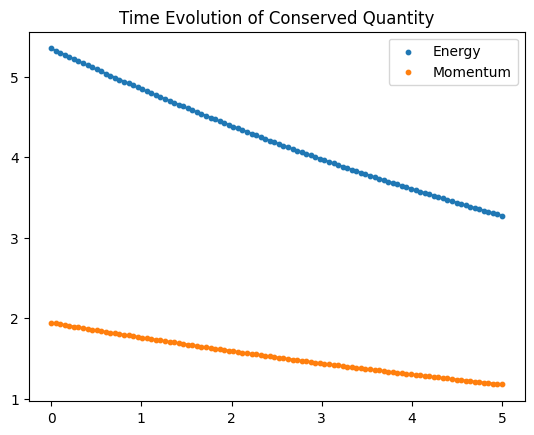

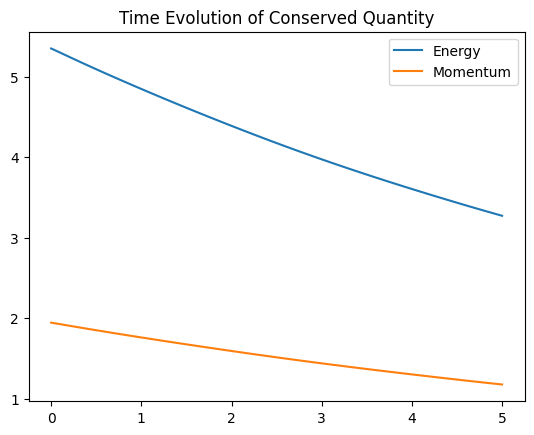

In [ ]:
def Plot():

  E =[]
  P = []


  for mm in range(0, N, 1):

    P.append(Calculation_of_P(R_pred1[mm, :], M_pred1[mm, :], x_space))
    E.append(Calculation_of_E(R_pred1[mm, :], M_pred1[mm, :], x_space))

  E_1 = np.array(E)
  P_1 = np.array(P)



  return  E_1,  P_1


E_1,  P_1 = Plot()


plt.scatter(t_space, E_1, s=10,  label="Energy")
plt.plot(t_space, E_1, linestyle="-" )

plt.scatter(t_space, P_1, s=10, label="Momentum")
plt.plot(t_space, P_1, linestyle="-")



plt.legend()
plt.title("Time Evolution of Conserved Quantity")


plt.savefig("conservedquantity_e_0.001.pdf", dpi='figure', transparent = True)
plt.show()




plt.plot(t_space, E_1, linestyle="-", label="Energy" )
plt.plot(t_space, P_1, linestyle="-" , label="Momentum")
plt.legend()
plt.title("Time Evolution of Conserved Quantity")
plt.show()

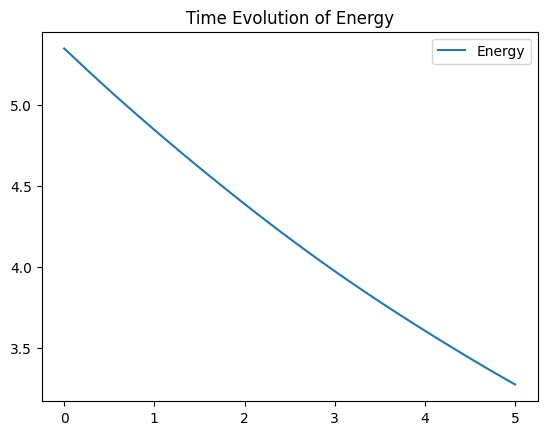

In [ ]:
plt.plot(t_space, E_1, linestyle="-", label="Energy" )

plt.legend()
plt.title("Time Evolution of Energy")
plt.show()
np.savetxt("E_e=0.05.csv", E_1, delimiter = ",")    # change of Energy value for differnnt value of e

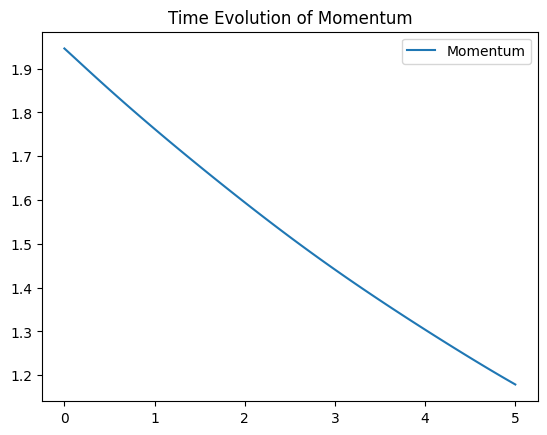

In [ ]:
plt.plot(t_space, P_1, linestyle="-", label="Momentum" )
plt.legend()
plt.title("Time Evolution of Momentum")
plt.show()



np.savetxt("P_1_e=0.05.csv", P_1,
              delimiter = ",")    # change of Energy value for differnnt value of e

In [ ]:
U_predicted

array([[0.00213891, 0.00205966, 0.00199304, ..., 0.00225583, 0.00230495,
        0.00236111],
       [0.00223846, 0.00207234, 0.00193133, ..., 0.00218973, 0.00224065,
        0.00229836],
       [0.00267083, 0.00246494, 0.00229344, ..., 0.00213133, 0.00218409,
        0.00224341],
       ...,
       [0.01186563, 0.0108973 , 0.01062826, ..., 0.00203349, 0.00200669,
        0.00197918],
       [0.01280184, 0.01173153, 0.01125498, ..., 0.00204887, 0.00202297,
        0.00199609],
       [0.01377582, 0.01262505, 0.01197129, ..., 0.00206356, 0.00203877,
        0.00201264]], dtype=float32)

In [ ]:
np.save('UU.npy', U_predicted)